In [ ]:
!pip install imagehash
!pip install pillow

In [ ]:
# Download dataset:
!wget http://206.12.93.90:8080/simpson_dataset/simpsons_train.tar.gz 
# Unzip the dataset:
!tar -xzvf simpsons_train.tar.gz > /dev/null

--2021-04-29 12:33:51--  http://206.12.93.90:8080/simpson_dataset/simpsons_train.tar.gz
Connecting to 206.12.93.90:8080... connected.
HTTP request sent, awaiting response... 200 
Length: 488194922 (466M) [application/x-gzip]
Saving to: ‘simpsons_train.tar.gz.1’

simpsons_train.tar. 100%[===================>] 465.58M  35.3MB/s    in 14s     

2021-04-29 12:34:04 (34.0 MB/s) - ‘simpsons_train.tar.gz.1’ saved [488194922/488194922]



In [ ]:
from PIL import Image
import imagehash
import glob
from IPython.display import display, clear_output
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def find_duplicates(path):
    url_list = glob.glob(f'{path}/*.jpg')
    image_list = []
    duplicates = []
    for filename in url_list: 
        img = Image.open(filename)
        image_list.append(img)
    
    while len(image_list) > 1:
        img1 = image_list.pop()
        img1_hash = imagehash.whash(img1)
        for img2 in image_list:
            img2_hash = imagehash.whash(img2)
            diff = img1_hash - img2_hash
            if diff < 2: # Similarity threshold
                duplicates.append((img1.filename, img2.filename))
                print(diff)
        clear_output(wait=True)
        print(f'Found {len(duplicates)} duplicates.')
    return duplicates
                
        

In [ ]:
# folder_list = glob.glob(f'dataset/simpsons_train/*')
folder_list = ['/content/dataset/simpsons_train/comic_book_guy', '/content/dataset/simpsons_train/kent_brockman', '/content/dataset/simpsons_train/homer_simpson']

for folder in folder_list:
    dupes = find_duplicates(folder)
    folder_name = folder.split('/')[-1]
    np.savetxt(f'drive/MyDrive/dupes_{folder_name}.csv', dupes, fmt='%s', delimiter=',')


Found 106 duplicates.


In [ ]:
folder = 'dfdf'
dupes = [(1,2), (3,4)]
np.savetxt(f'drive/MyDrive/dupes_{folder}.csv', dupes, fmt='%s', delimiter=',')

In [ ]:
def show_duplicates(paths):
    fig, axs = plt.subplots(len(paths), 2, figsize=(10, len(paths) * 5))
    for i in range(len(paths)):
        axs[i, 0].imshow(Image.open(paths[i] [0]))
        axs[i, 0].set_title(paths[i][0][-16:])
        axs[i, 1].imshow(Image.open(paths[i][1]))
        axs[i, 1].set_title(paths[i][1][-16:])

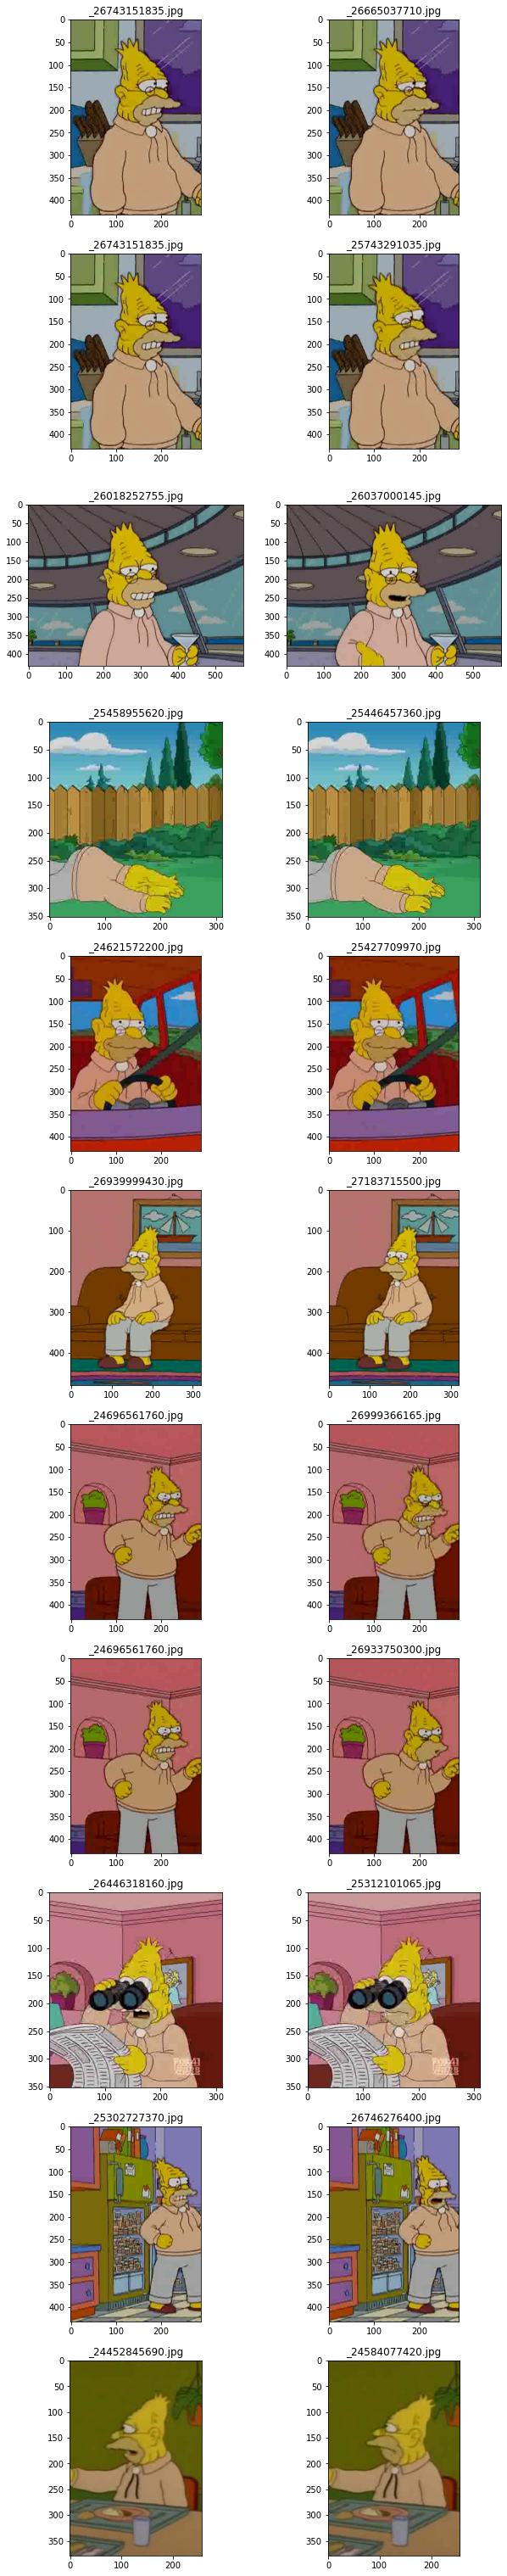

In [ ]:
show_duplicates(dupes)

In [ ]:
a = [1, 2, 3]
b = [3,4,5]
a += b

In [ ]:
folder_list

['simpsons_train/charles_montgomery_burns',
 'simpsons_train/chief_wiggum',
 'simpsons_train/milhouse_van_houten',
 'simpsons_train/lenny_leonard',
 'simpsons_train/sideshow_bob',
 'simpsons_train/moe_szyslak',
 'simpsons_train/edna_krabappel',
 'simpsons_train/ned_flanders',
 'simpsons_train/abraham_grampa_simpson',
 'simpsons_train/krusty_the_clown',
 'simpsons_train/apu_nahasapeemapetilon',
 'simpsons_train/marge_simpson',
 'simpsons_train/comic_book_guy',
 'simpsons_train/nelson_muntz',
 'simpsons_train/mayor_quimby',
 'simpsons_train/kent_brockman',
 'simpsons_train/principal_skinner',
 'simpsons_train/bart_simpson',
 'simpsons_train/lisa_simpson',
 'simpsons_train/homer_simpson']

In [ ]:
'simpsons_train/charles_montgomery_burns'.split('/')[-1]

'charles_montgomery_burns'